# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable

load_dotenv()
api_key = os.getenv("news_api_key")
type(api_key)

str

In [3]:
# Create a newsapi client

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles

bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en")

In [5]:
# Fetch the Ethereum news articles

ethereum_articles = newsapi.get_everything(q="ethereum", language="en")

In [6]:
len(ethereum_articles)

3

In [7]:
bitcoin_articles

{'status': 'ok',
 'totalResults': 4239,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Jonathan Shieber',
   'title': 'Casa pivots to provide self-custody services to secure bitcoin',
   'description': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbase. “With self-custody using Casa it’s impossible to be hacke…',
   'url': 'http://techcrunch.com/2020/08/06/casa-pivots-to-provide-self-custody-services-to-secure-bitcoin/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/06/GettyImages-1050523528.jpg?w=600',
   'publishedAt': '2020-08-06T18:25:29Z',
   'content': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]'},
  {'source

In [8]:
def sentiment_scores(text):
    sentiment_scores = {}
    text_sentiment = analyzer.polarity_scores(text)
    sentiment_scores["compound"] = text_sentiment["compound"]
    sentiment_scores["positive"] = text_sentiment["pos"]
    sentiment_scores["neutral"] = text_sentiment["neu"]
    sentiment_scores["negative"] = text_sentiment["neg"]
    sentiment_scores["text"] = text
    if text_sentiment["compound"] >= 0.05:  # Positive
        sentiment_scores["normalized"] = 1
    elif text_sentiment["compound"] <= -0.05:  # Negative
        sentiment_scores["normalized"] = -1
    else:
        sentiment_scores["normalized"] = 0  # Neutral

    return sentiment_scores

def get_sentiments(set_of_articles):
    sentiments_data = []
    for article in set_of_articles["articles"]:
        try:
            sentiments_data.append(
                sentiment_scores(article["content"])
            )

        except AttributeError:
            pass
    return sentiments_data

def sentiment_to_df(sentiments):
    news_df = pd.DataFrame(sentiments)
    return news_df

In [9]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiment = get_sentiments(bitcoin_articles)
bitcoin_df = sentiment_to_df(bitcoin_sentiment)
bitcoin_df.head()

,compound,positive,neutral,negative,text,normalized
0,0.5994,0.149,0.851,0.000,"Casa, a Colorado-based provider of bitcoin sec...",1
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...",0
2,-0.0516,0.065,0.864,0.071,"The question still remained, though, whether a...",-1
3,0.5106,0.122,0.878,0.000,A ransomware variant called NetWalker is doing...,1
4,0.2732,0.063,0.937,0.000,“The COVID-19 pandemic has resulted in a mass ...,1


In [10]:
# Create the ethereum sentiment scores DataFrame

ethereum_sentiment = get_sentiments(ethereum_articles)
ethereum_df = sentiment_to_df(ethereum_sentiment)
ethereum_df.head()

,compound,positive,neutral,negative,text,normalized
0,0.7506,0.209,0.791,0.000,If you've interacted with cryptocurrencies in ...,1
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,0
2,0.7579,0.181,0.819,0.000,LONDON (Reuters) - It sounds like a surefire b...,1
3,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,0
4,-0.2677,0.045,0.881,0.074,An outspoken Bitcoin whale who rarely shows af...,-1


In [11]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,positive,neutral,negative,normalized
count,20.000000,20.000000,20.00000,20.000000,20.000000
mean,0.411560,0.086450,0.90770,0.005850,0.750000
std,0.225249,0.042427,0.03952,0.018457,0.638666
min,-0.128000,0.000000,0.80200,0.000000,-1.000000
25%,0.365900,0.072000,0.91000,0.000000,1.000000
50%,0.507000,0.090000,0.91000,0.000000,1.000000
75%,0.507000,0.090000,0.91425,0.000000,1.000000
max,0.750600,0.198000,1.00000,0.071000,1.000000


In [12]:
# Describe the Ethereum Sentiment

ethereum_df.describe()

,compound,positive,neutral,negative,normalized
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.175306,0.068118,0.908235,0.023647,0.294118
std,0.363004,0.066254,0.090980,0.056465,0.771744
min,-0.599400,0.000000,0.732000,0.000000,-1.000000
25%,0.000000,0.000000,0.877000,0.000000,0.000000
50%,0.000000,0.062000,0.920000,0.000000,0.000000
75%,0.401900,0.110000,1.000000,0.000000,1.000000
max,0.757900,0.209000,1.000000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [14]:
# Complete the tokenizer function
    
def tokenizer(text):
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]

In [15]:
# Create a new tokens column for bitcoin

bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,compound,positive,neutral,negative,text,normalized,tokens
0,0.5994,0.149,0.851,0.000,"Casa, a Colorado-based provider of bitcoin sec...",1,"[casa, coloradobased, provider, bitcoin, secur..."
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...",0,"[april, secret, service, seized, bitcoins, cla..."
2,-0.0516,0.065,0.864,0.071,"The question still remained, though, whether a...",-1,"[question, still, remained, though, whether, g..."
3,0.5106,0.122,0.878,0.000,A ransomware variant called NetWalker is doing...,1,"[ransomware, variant, called, netwalker, surpr..."
4,0.2732,0.063,0.937,0.000,“The COVID-19 pandemic has resulted in a mass ...,1,"[covid, pandemic, resulted, mass, shift, worki..."


In [16]:
# Create a new tokens column for ethereum

ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,compound,positive,neutral,negative,text,normalized,tokens
0,0.7506,0.209,0.791,0.000,If you've interacted with cryptocurrencies in ...,1,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,0,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,0.7579,0.181,0.819,0.000,LONDON (Reuters) - It sounds like a surefire b...,1,"[london, reuters, sound, like, surefire, bet, ..."
3,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,0,"[new, york, reuters, brooklynbased, technology..."
4,-0.2677,0.045,0.881,0.074,An outspoken Bitcoin whale who rarely shows af...,-1,"[outspoken, bitcoin, whale, rarely, show, affe..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
bitcoin_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
bigram_bitcoin_counts = Counter(ngrams(bitcoin_tokens, n=2))
bigram_bitcoin_counts.most_common(20)

[(('satoshi', 'nakaboto'), 22),
 (('char', 'robot'), 11),
 (('robot', 'colleague'), 11),
 (('colleague', 'satoshi'), 11),
 (('nakaboto', 'writes'), 11),
 (('writes', 'bitcoin'), 11),
 (('every', 'fucking'), 11),
 (('fucking', 'daywelcome'), 11),
 (('daywelcome', 'another'), 11),
 (('another', 'edition'), 11),
 (('edition', 'bitcoin'), 11),
 (('bitcoin', 'today'), 11),
 (('today', 'satoshi'), 11),
 (('nakaboto', 'tell'), 11),
 (('tell', 'whats'), 11),
 (('whats', 'going'), 11),
 (('going', 'bitcoin'), 11),
 (('bitcoin', 'char'), 11),
 (('bitcoin', 'btc'), 9),
 (('btc', 'every'), 9)]

In [19]:
bitcoin_tokens

['casa',
 'coloradobased',
 'provider',
 'bitcoin',
 'security',
 'service',
 'launching',
 'managed',
 'service',
 'allowing',
 'customer',
 'buy',
 'hold',
 'bitcoin',
 'rather',
 'using',
 'external',
 'custodian',
 'like',
 'coinbas',
 'char',
 'april',
 'secret',
 'service',
 'seized',
 'bitcoins',
 'clark',
 'nyt',
 'report',
 'week',
 'later',
 'bennett',
 'received',
 'letter',
 'explaining',
 'secret',
 'service',
 'recovered',
 'bitcoins',
 'letter',
 'cited',
 'char',
 'question',
 'still',
 'remained',
 'though',
 'whether',
 'gpucrunching',
 'would',
 'actually',
 'work',
 'month',
 'hammering',
 'problem',
 'stay',
 'finally',
 'ready',
 'try',
 'guy',
 'hadnt',
 'given',
 'entire',
 'zip',
 'f',
 'char',
 'ransomware',
 'variant',
 'called',
 'netwalker',
 'surprisingly',
 'well',
 'even',
 'economy',
 'malware',
 'take',
 'computer',
 'hostage',
 'asks',
 'bitcoin',
 'ransom',
 'raked',
 'million',
 'last',
 'five',
 'char',
 'covid',
 'pandemic',
 'resulted',
 'mass',


In [20]:
# Generate the Bitcoin N-grams where N=2

bitcoin_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
bigram_bitcoin_counts = Counter(ngrams(bitcoin_tokens, n=2))
bigram_bitcoin_counts.most_common(20)

[(('satoshi', 'nakaboto'), 22),
 (('char', 'robot'), 11),
 (('robot', 'colleague'), 11),
 (('colleague', 'satoshi'), 11),
 (('nakaboto', 'writes'), 11),
 (('writes', 'bitcoin'), 11),
 (('every', 'fucking'), 11),
 (('fucking', 'daywelcome'), 11),
 (('daywelcome', 'another'), 11),
 (('another', 'edition'), 11),
 (('edition', 'bitcoin'), 11),
 (('bitcoin', 'today'), 11),
 (('today', 'satoshi'), 11),
 (('nakaboto', 'tell'), 11),
 (('tell', 'whats'), 11),
 (('whats', 'going'), 11),
 (('going', 'bitcoin'), 11),
 (('bitcoin', 'char'), 11),
 (('bitcoin', 'btc'), 9),
 (('btc', 'every'), 9)]

In [21]:
# Generate the Ethereum N-grams where N=2

ethereum_tokens = [item for sublist in ethereum_df.tokens.to_list() for item in sublist]
bigram_ethereum_counts = Counter(ngrams(ethereum_tokens, n=2))
bigram_ethereum_counts.most_common(20)

[(('char', 'ethereum'), 3),
 (('satoshi', 'nakaboto'), 2),
 (('photo', 'illustration'), 2),
 (('imageslightrocket', 'via'), 2),
 (('via', 'getty'), 2),
 (('price', 'bitcoin'), 2),
 (('creator', 'coin'), 2),
 (('youve', 'interacted'), 1),
 (('interacted', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'past'), 1),
 (('past', 'couple'), 1),
 (('couple', 'year'), 1),
 (('year', 'there'), 1),
 (('there', 'good'), 1),
 (('good', 'chance'), 1),
 (('chance', 'youve'), 1),
 (('youve', 'used'), 1),
 (('used', 'metamask'), 1),
 (('metamask', 'cryptocurrency'), 1),
 (('cryptocurrency', 'wallet'), 1)]

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin

bitcoin_top_10_tokens = token_count(bitcoin_tokens)
bitcoin_top_10_tokens

[('bitcoin', 37),
 ('satoshi', 22),
 ('nakaboto', 22),
 ('char', 20),
 ('robot', 11),
 ('colleague', 11),
 ('writes', 11),
 ('every', 11),
 ('fucking', 11),
 ('daywelcome', 11)]

In [24]:
# Get the top 10 words for Ethereum

ethereum_top_10_tokens = token_count(ethereum_tokens)
ethereum_top_10_tokens

[('char', 17),
 ('bitcoin', 9),
 ('ethereum', 8),
 ('cryptocurrency', 5),
 ('price', 4),
 ('one', 4),
 ('youve', 3),
 ('blockchain', 3),
 ('could', 3),
 ('new', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

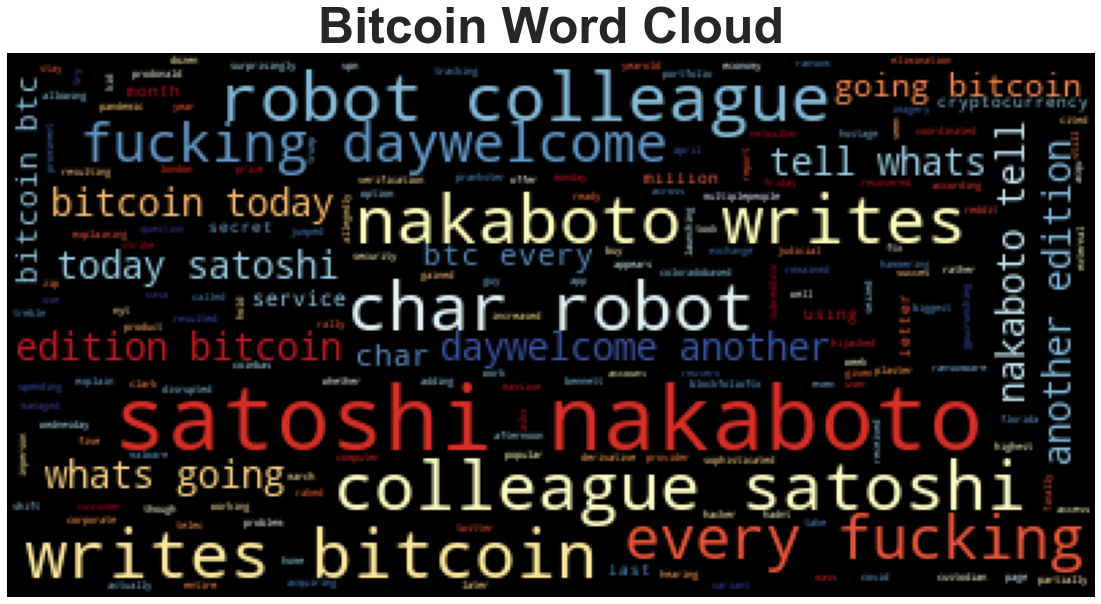

In [26]:
# Generate the Bitcoin word cloud

wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(bitcoin_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

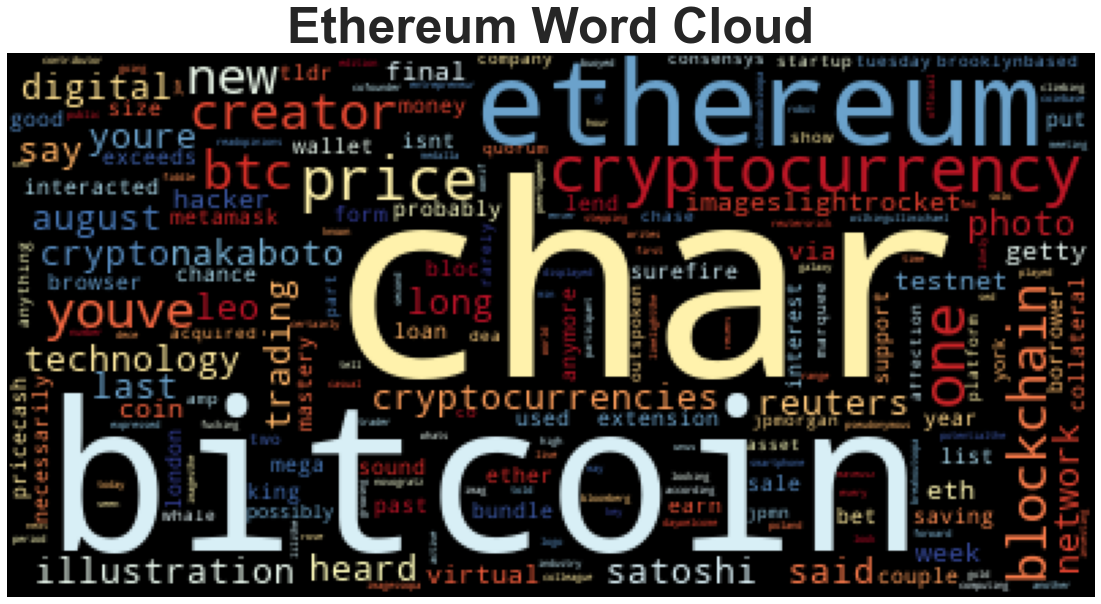

In [27]:
# Generate the Ethereum word cloud

wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(ethereum_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together

bitcoin_text_str = " ".join(bitcoin_df.text.to_list())
print(bitcoin_text_str)

Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars] In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars] The question still remained, though, whether all that GPU-crunching would actually work. After months of hammering on the problem, Stay was finally ready to try. The Guy hadn't given the entire ZIP f… [+2880 chars] A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five… [+1606 chars] “The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-p

In [31]:
# Run the NER processor on all of the text

bitcoin_doc = nlp(bitcoin_text_str)

# Add a title to the document

bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization

displacy.render(bitcoin_doc,style='ent')

In [33]:
# List all Entities

for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Casa ORG
Colorado GPE
Coinbas ORG
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
VPN PRODUCT
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Wednesday DATE
17-year-old DATE
Florida GPE
Twitter ORG
last month DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

ethereum_text_str = " ".join(ethereum_df.text.to_list())
print(ethereum_text_str)

If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars] TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.
Cash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform Quorum, the companies said on Tuesday. 
As part of the dea… [+1915 chars] An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.
The pseudonymous trad

In [35]:
# Run the NER processor on all of the text

ethereum_doc = nlp(ethereum_text_str)

# Add a title to the document

ethereum_doc.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization

displacy.render(ethereum_doc,style='ent')

In [37]:
# List all Entities

for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Casa ORG
Colorado GPE
Coinbas ORG
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
VPN PRODUCT
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Wednesday DATE
17-year-old DATE
Florida GPE
Twitter ORG
last month DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto 